<a href="https://colab.research.google.com/github/SimonSaysGiveMeSmile/Caffeinated-Treasury-Bot-ORIE-4741-/blob/main/data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/SimonSaysGiveMeSmile/Caffeinated-Treasury-Bot-ORIE-4741-/blob/main/data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ORIE 4741 / 5741 Term Project**
## *- Caffinated Treasury Bot - Data Analysis*

### Authors:
Cecilia Yang - xy96@cornell.edu <br>
Kayla Yang - cy354@cornell.edu<br>
Simon (Jiahe) Tian - jt886@cornell.edu <br>

## Import Libraries

In [1]:
# Import data manipulation libraries
#import necessary packages
import re
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.preprocessing import LabelEncoder

import plotly.express as px
px.defaults.width, px.defaults.height = 1000, 600

# Set precision
pd.set_option('display.precision', 4)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# This sets the aesthetics for seaborn plots
sns.set()

from scipy.stats import percentileofscore

## Import Cleaned Datasets

In [2]:
df_train=pd.read_csv('train_cleaned.csv')

In [41]:
df_train.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [3]:
# Understand the statistics of the datasets
print("Size of the cleaned training set: ", df_train.shape)
print("Size of the cleaned testing set: ", df_test.shape)

Size of the cleaned training set:  (44681, 28)
Size of the cleaned testing set:  (21938, 27)


In [4]:
print("Stats of the training dataset:")
df_train.describe()

Stats of the training dataset:


Age  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
count  44681.0000     4.4681e+04             44681.0000         44681.0000   
mean      32.8546     1.7716e+05              3996.5620             5.5762   
std       10.6227     1.4522e+06              3066.5046             2.5571   
min       14.0000     7.0059e+03               303.6454             0.0000   
25%       24.0000     1.8755e+04              1567.7867             4.0000   
50%       32.0000     3.5854e+04              2975.7250             6.0000   
75%       41.0000     6.9342e+04              5685.0567             8.0000   
max       95.0000     2.4198e+07             15204.6333            11.0000   

       Num_Credit_Card  Interest_Rate  Num_of_Loan  Delay_from_due_date  \
count       44681.0000     44681.0000   44681.0000           44681.0000   
mean            5.6755        15.3511       4.0071              22.3009   
std             2.0818         8.8582       2.2245              15.2076   
min             0.0000         1.0000       1.0000               0.0000   
25%             4.0000         8.0000       2.0000              11.0000   
50%             6.0000        15.0000       4.0000              19.0000   
75%             7.0000        21.0000       6.0000              29.0000   
max            11.0000        34.0000       9.0000              67.0000   

       Num_of_Delayed_Payment  Changed_Credit_Limit  Num_Credit_Inquiries  \
count              44681.0000            44681.0000            44681.0000   
mean                  13.8652               10.7977                6.1404   
std                    6.1728                6.9340                3.9048   
min                    0.0000               -6.4500                0.0000   
25%                    9.0000                5.6600                3.0000   
50%                   14.0000                9.7300                6.0000   
75%                   19.0000               15.5200                9.0000   
max                   28.0000               36.4900               17.0000   

       Outstanding_Debt  Credit_Utilization_Ratio  Credit_History_Age  \
count        44681.0000                44681.0000          44681.0000   
mean          1524.4134                   32.1572             17.6738   
std           1196.6700                    5.0647              8.3340   
min              0.2300                   20.0000              0.1667   
25%            614.6000                   27.9693             11.0833   
50%           1255.5700                   32.1649             17.5000   
75%           2164.8400                   36.3697             24.2500   
max           4998.0700                   49.5645             33.6667   

       Total_EMI_per_month  Amount_invested_monthly  Monthly_Balance  
count           44681.0000               44681.0000       44681.0000  
mean              109.5443                 188.2025         380.4220  
std                94.3603                 192.7834         193.8858  
min                 4.4628                   0.0000           0.0078  
25%                40.1775                  69.8446         264.4731  
50%                75.0023                 124.1070         324.0091  
75%               155.9091                 226.9512         441.2153  
max               499.9292                1977.3261        1552.9461

We can see that both the training and the testing dataset have an identical characteristics across their columns.

In [5]:
#df_train_reduced = df_test.drop(['Customer_ID', 'ID', 'Name', 'SSN', 'Occupation','Monthly_Inhand_Salary'], axis = 1) ### df_test?
df_train_reduced = df_train.drop(['Customer_ID', 'ID', 'Name', 'SSN', 'Occupation','Monthly_Inhand_Salary'], axis = 1)

#####
#####
df_test_reduced= df_test.drop(['Customer_ID', 'ID', 'Name', 'SSN', 'Occupation','Monthly_Inhand_Salary'], axis = 1)
df_train_reduced.head(100)

Month   Age  Annual_Income  Num_Bank_Accounts  Num_Credit_Card  \
0    January  23.0       19114.12                  3                4   
1        May  23.0       19114.12                  3                4   
2       July  23.0       19114.12                  3                4   
3   February  28.0       34847.84                  2                4   
4        May  28.0       34847.84                  2                4   
..       ...   ...            ...                ...              ...   
95      July  40.0       28572.39                  6                3   
96   January  37.0       39641.54                 10                8   
97  February  37.0       39641.54                 10                8   
98      July  37.0       39641.54                 10                8   
99    August  38.0       39641.54                 10                8   

    Interest_Rate  Num_of_Loan  \
0               3          4.0   
1               3          4.0   
2               3          4.0   
3               6          1.0   
4               6          1.0   
..            ...          ...   
95             15          3.0   
96             25          6.0   
97             25          6.0   
98             25          6.0   
99             25          6.0   

                                         Type_of_Loan  Delay_from_due_date  \
0   Auto Loan, Credit-Builder Loan, Personal Loan,...                    3   
1   Auto Loan, Credit-Builder Loan, Personal Loan,...                    6   
2   Auto Loan, Credit-Builder Loan, Personal Loan,...                    3   
3                                 Credit-Builder Loan                    7   
4                                 Credit-Builder Loan                    3   
..                                                ...                  ...   
95          Payday Loan, Not Specified, and Auto Loan                   25   
96  Auto Loan, Student Loan, Payday Loan, Payday L...                   61   
97  Auto Loan, Student Loan, Payday Loan, Payday L...                   61   
98  Auto Loan, Student Loan, Payday Loan, Payday L...                   61   
99  Auto Loan, Student Loan, Payday Loan, Payday L...                   61   

    Num_of_Delayed_Payment  ...  Credit_Mix  Outstanding_Debt  \
0                      7.0  ...           _            809.98   
1                      4.0  ...        Good            809.98   
2                      4.0  ...        Good            809.98   
3                      1.0  ...        Good            605.03   
4                      1.0  ...        Good            605.03   
..                     ...  ...         ...               ...   
95                    13.0  ...    Standard            400.07   
96                    13.0  ...           _           2258.73   
97                    16.0  ...           _           2258.73   
98                    14.0  ...         Bad           2258.73   
99                    13.0  ...         Bad           2258.73   

   Credit_Utilization_Ratio  Credit_History_Age  Payment_of_Min_Amount  \
0                   26.8226             22.0833                     No   
1                   24.7973             22.4167                     No   
2                   22.5376             22.5833                     No   
3                   38.5508             26.6667                     No   
4                   34.9779             26.9167                     No   
..                      ...                 ...                    ...   
95                  35.0259             30.5833                    Yes   
96                  34.1257             30.8333                    Yes   
97                  33.4146              8.7500                     NM   
98                  23.1965              9.0833                    Yes   
99                  34.8490              9.2500                    Yes   

    Total_EMI_per_month Amount_invested_monthly  \
0               49.5749                 80.4153   
1           

### General Distribution of the Data

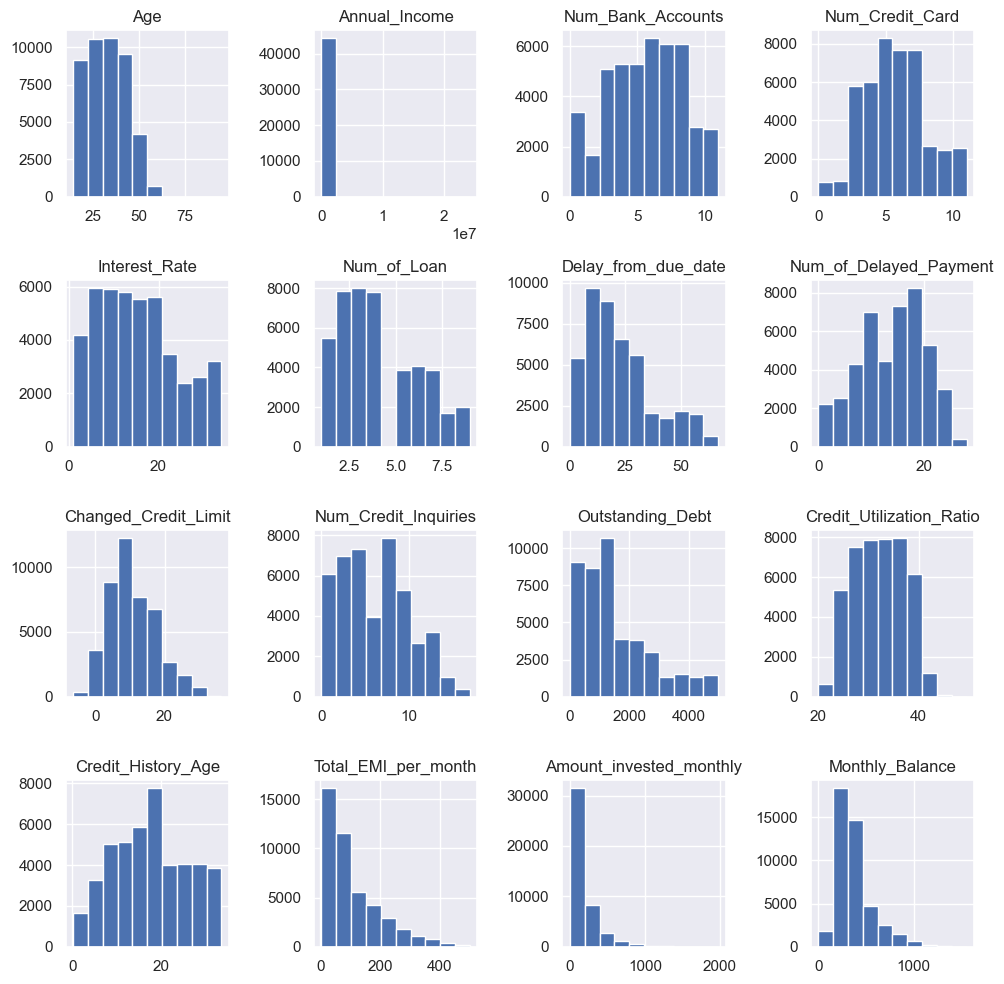

In [6]:
df_train_reduced.hist(figsize=(10, 10))
plt.tight_layout()
plt.show()

### Obervations:

***Right-Skewed***:

- Annual Income

- Interest Rate

- Number of Loan

- Delay from Due Date

- Changed Credit Limit

- Outstanding Debt

- Credit History Age

- Total EMI per Month

- Amount Invested Monthly

- Monthly Balance

***Left-Skewed***:

- Number of Delayed Payment


***Symmetrical***:

- Age

- Number of Bank Accounts

- Number of Credit Cards

- Number of Credit Inquiries

- Credit Utilization Ratio


### Correlation map of Numerical Columns

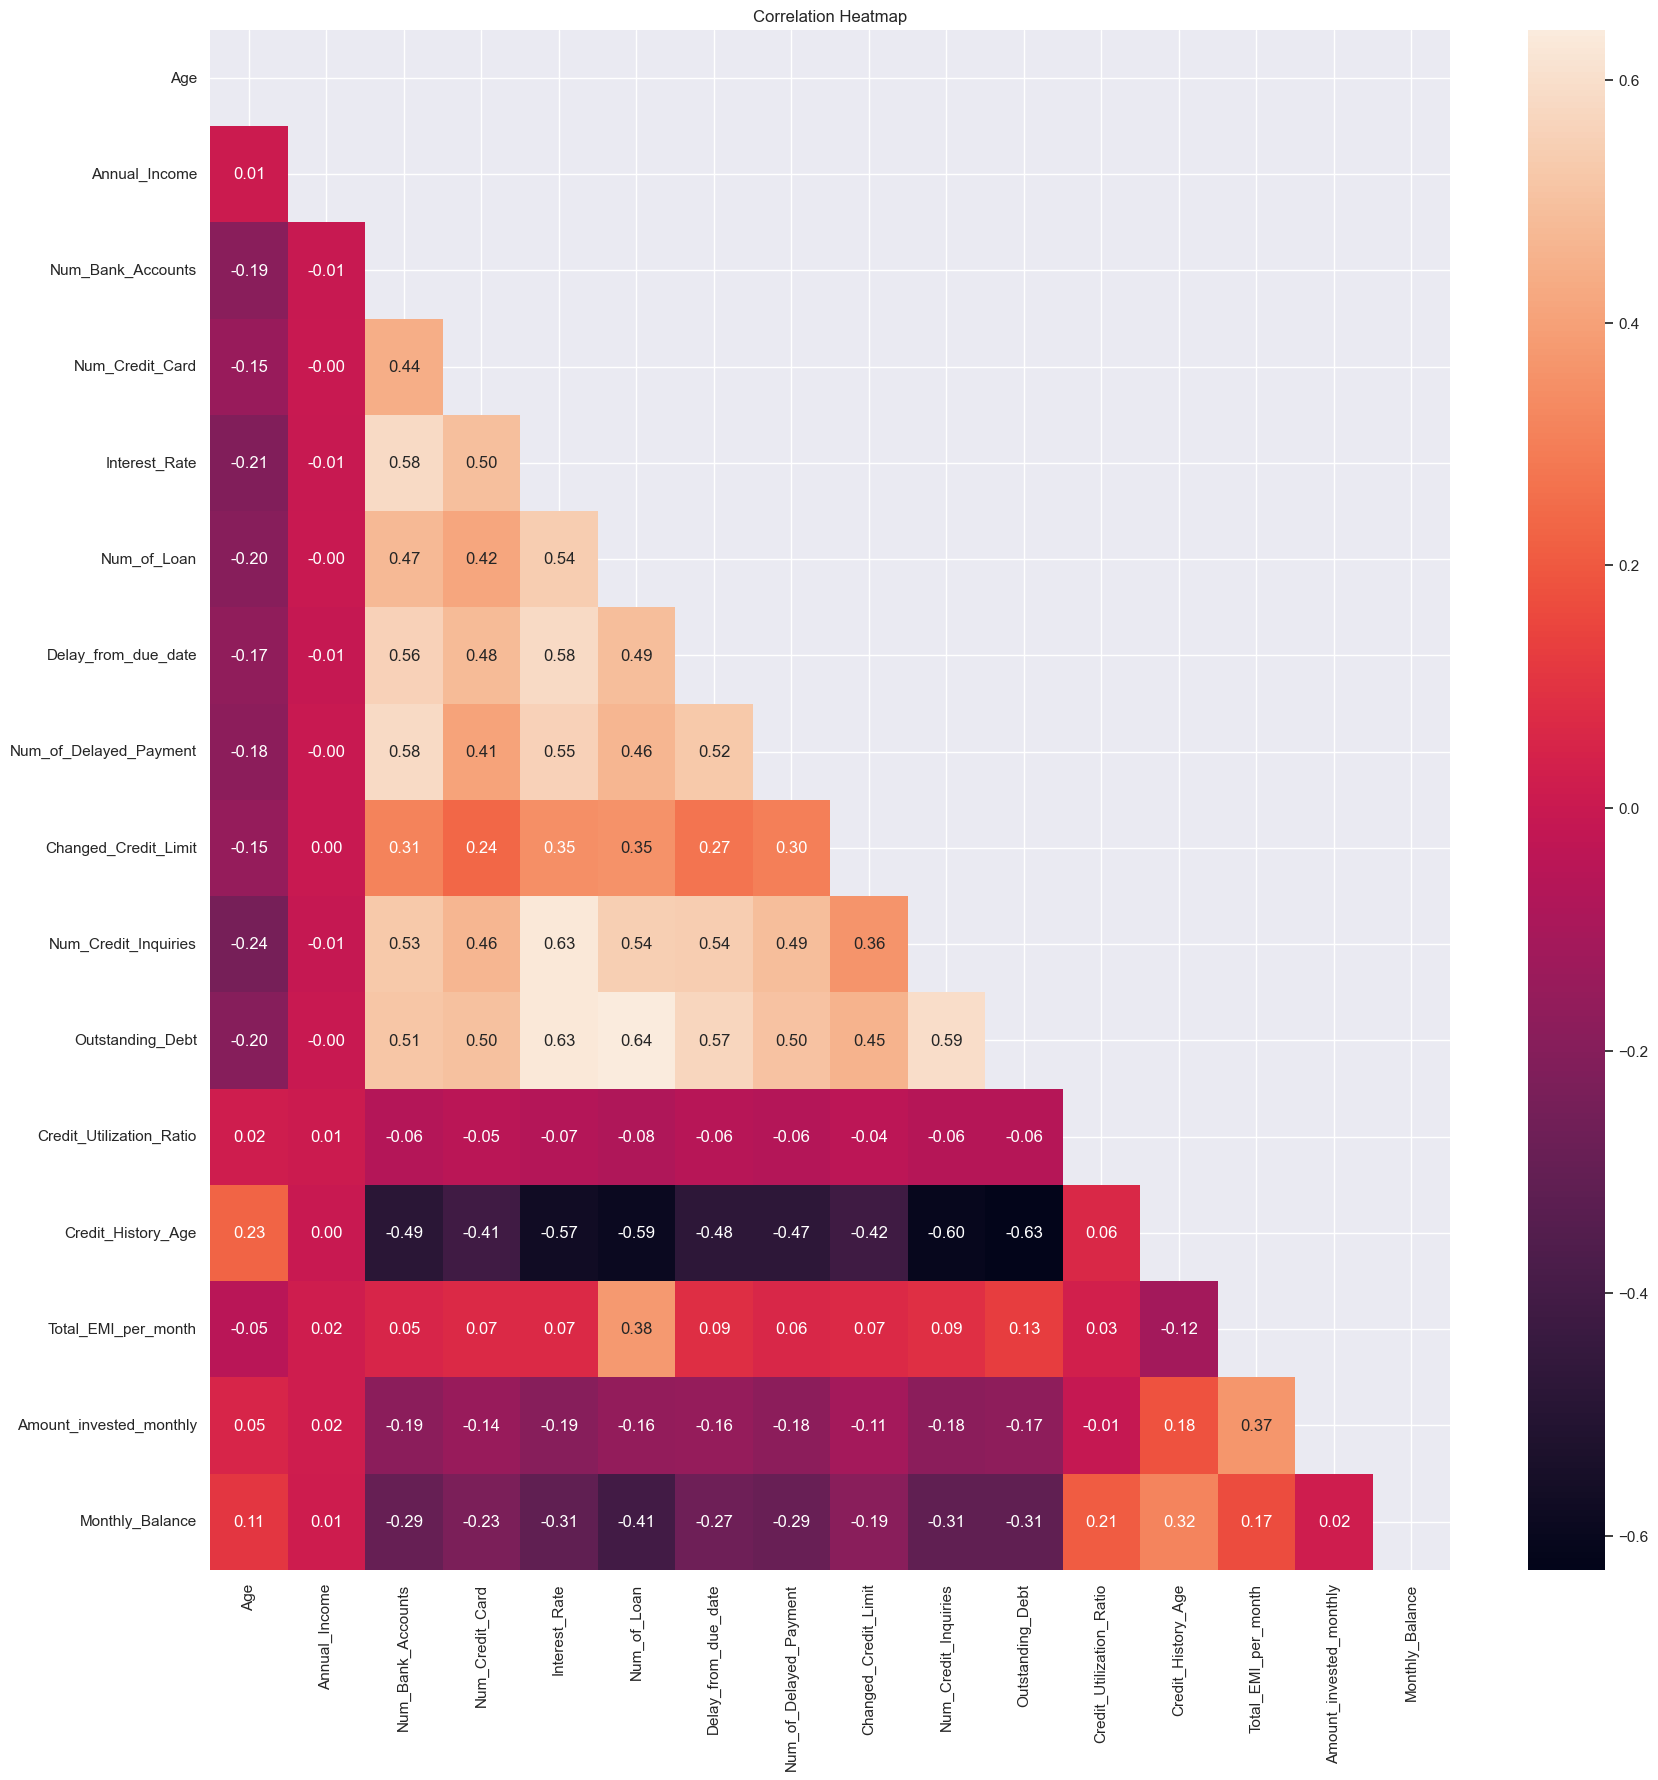

In [7]:
plt.figure(figsize=(20, 20))
correlation = df_train_reduced.select_dtypes(include=['float64', 'int64']).corr()
mask = np.triu(np.ones_like(correlation, dtype=bool))
sns.heatmap(correlation,  mask=mask, annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

We want to filter out the correlation above a certain threshold, for instance, 0.5.

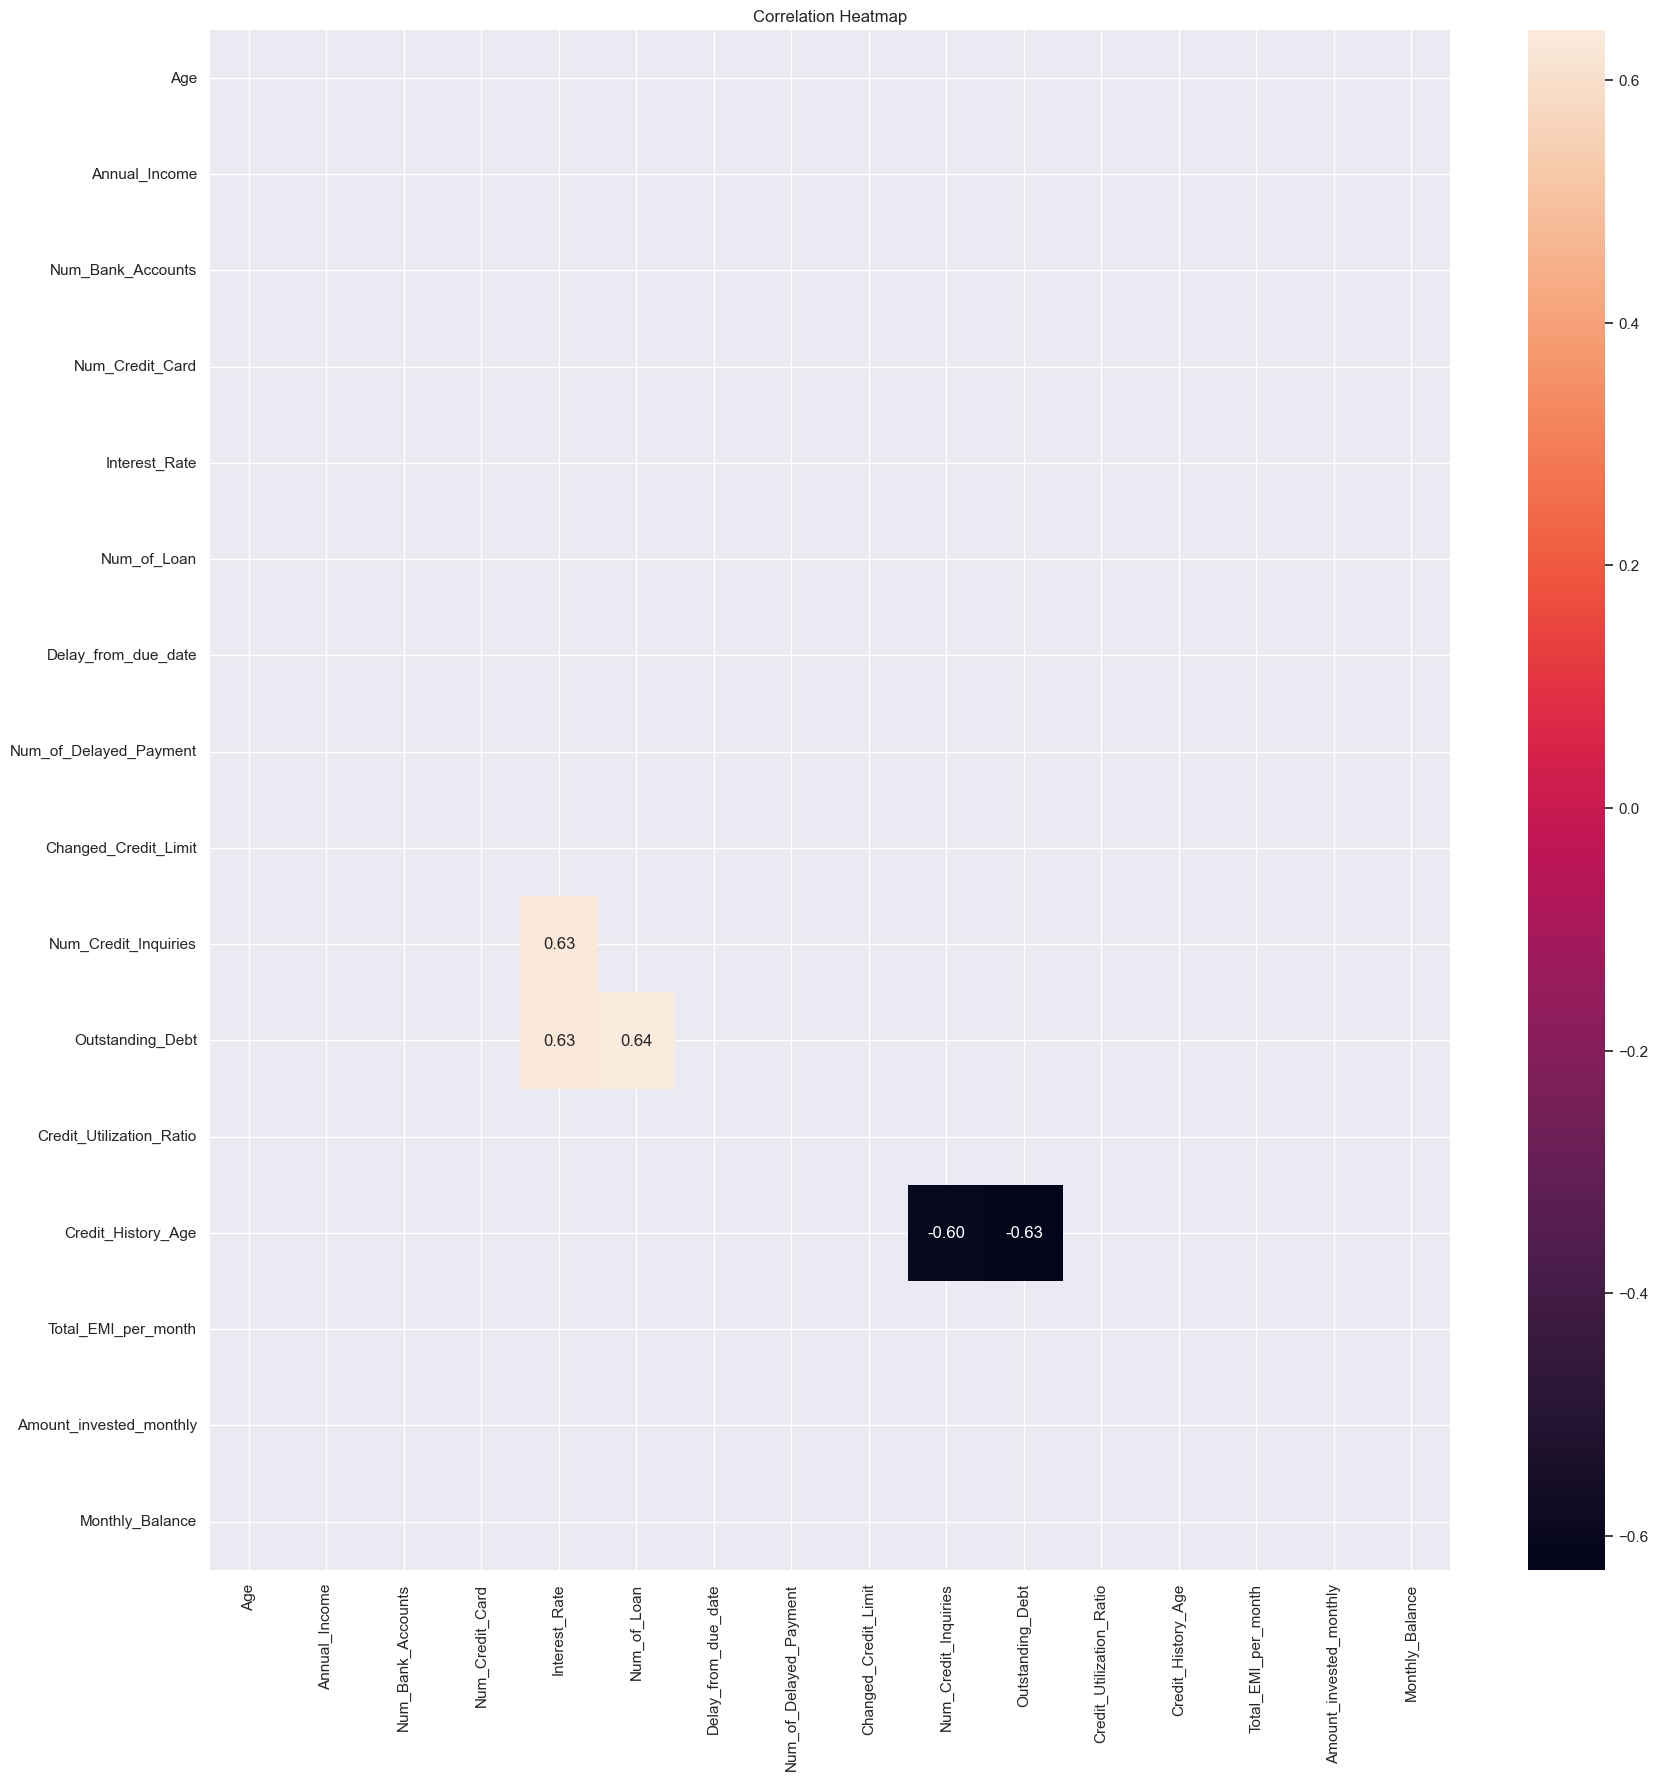

Interest_Rate and Num_Credit_Inquiries: 0.63
Interest_Rate and Outstanding_Debt: 0.63
Num_of_Loan and Outstanding_Debt: 0.64
Num_Credit_Inquiries and Credit_History_Age: -0.60
Outstanding_Debt and Credit_History_Age: -0.63


In [8]:
threshold = 0.6

correlation = df_train_reduced.select_dtypes(include=['float64', 'int64']).corr()

mask = np.triu(np.ones_like(correlation, dtype=bool))
mask |= np.abs(correlation) < threshold

plt.figure(figsize=(20, 20))
sns.heatmap(correlation,  mask=mask, annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


# Printout the correlations that are above the threshold and their values
for i in range(correlation.shape[0]):
    for j in range(i + 1, correlation.shape[1]):
        if np.abs(correlation.iloc[i, j]) >= threshold:
            print(f"{correlation.index[i]} and {correlation.columns[j]}: {correlation.iloc[i, j]:.2f}")

### Observations:

From the above correlation matrix, the below columns have high correlations:

- Interest_Rate and Num_Credit_Inquiries: **0.63**
- Interest_Rate and Outstanding_Debt: **0.63**
- Num_of_Loan and Outstanding_Debt: **0.64**
- Num_Credit_Inquiries and Credit_History_Age: **-0.60**
- Outstanding_Debt and Credit_History_Age: **-0.63**


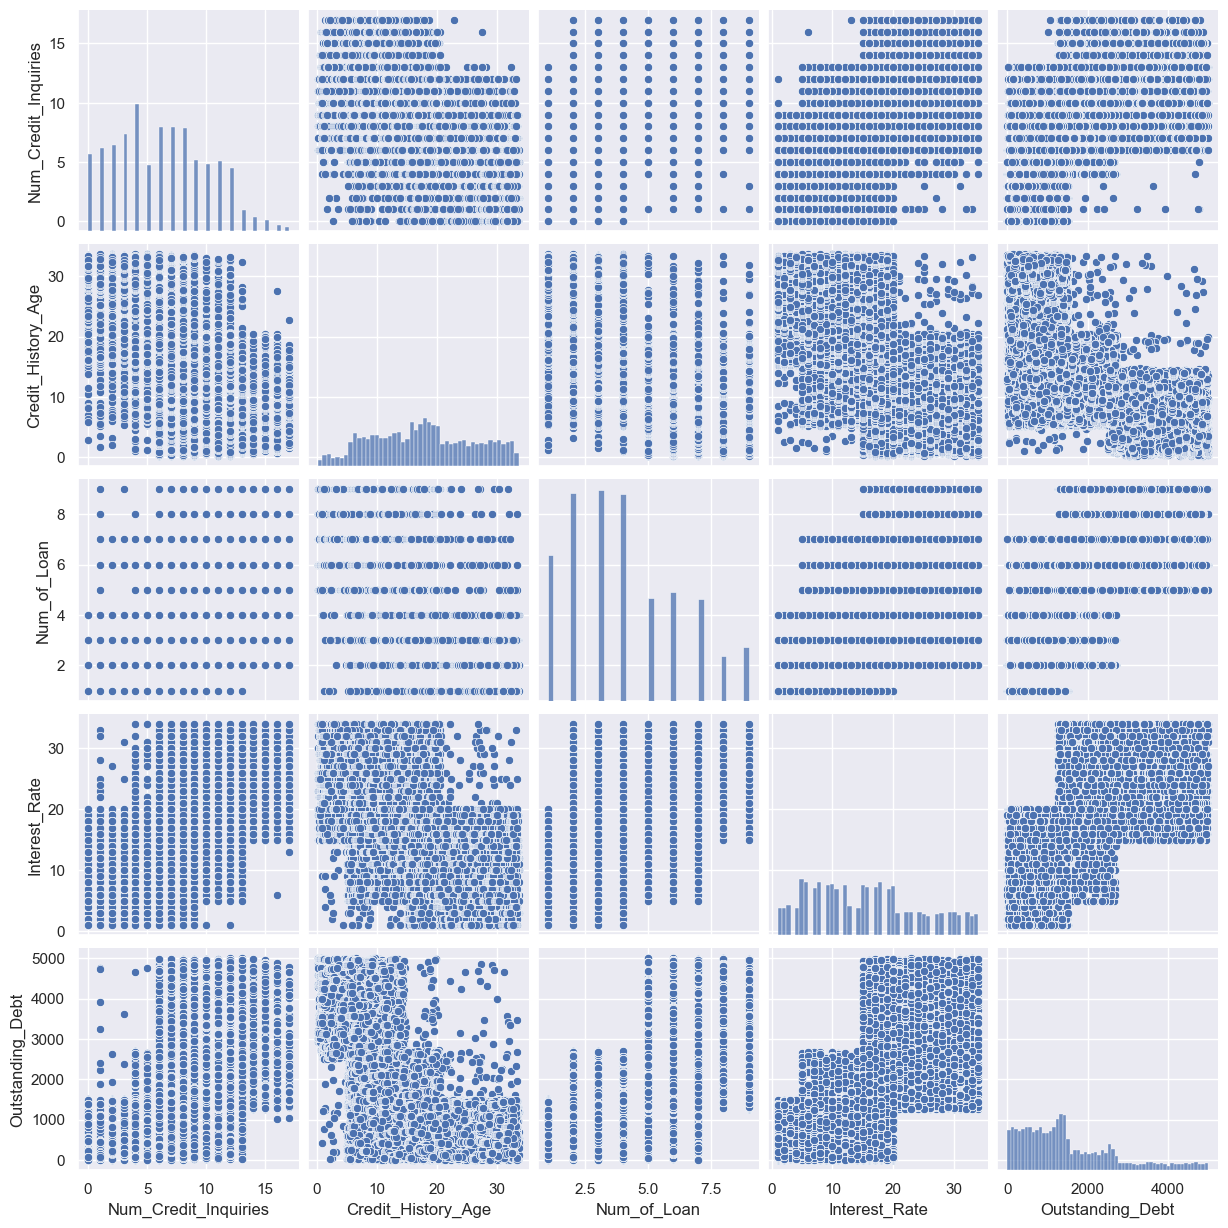

In [9]:
import warnings
warnings.filterwarnings('ignore')

sns.pairplot(df_train_reduced[['Num_Credit_Inquiries', 'Credit_History_Age','Num_of_Loan','Interest_Rate','Outstanding_Debt']])
plt.show()

### Observations:

From the above plot, we can see that

- **Num_Credit_Inquiries and Num_of_Loan**: Positive correlation; an increase in one seems to be associated with an increase in the other.

- **Credit_History_Age and Interest_Rate**: Potential negative correlation; longer credit history might be associated with lower interest rates, but the relationship isn’t very strong.

- **Outstanding_Debt**: Weak positive relationships with Num_of_Loan and Num_Credit_Inquiries; however, no clear linear pattern is visible.

### Modify Categorical Columns
Now we want to examine the non-numerical columns to apply one-hot encoding method

In [10]:
# To count the frequency of all unique values within the columns

for column in df_train_reduced.columns:
    print(f"Unique values in column {column}:")
    print(df_train_reduced[column].value_counts())
    print("\n")

Unique values in column Month:
January     5706
May         5626
March       5601
February    5585
June        5584
July        5547
April       5545
August      5487
Name: Month, dtype: int64


Unique values in column Age:
38.0    1448
26.0    1410
25.0    1380
28.0    1369
31.0    1367
27.0    1352
44.0    1347
36.0    1334
43.0    1332
34.0    1328
32.0    1321
39.0    1308
35.0    1303
37.0    1297
19.0    1283
23.0    1283
30.0    1280
41.0    1261
21.0    1254
29.0    1250
24.0    1249
22.0    1235
20.0    1234
45.0    1223
40.0    1202
33.0    1188
42.0    1188
18.0    1172
15.0     814
17.0     785
16.0     732
46.0     687
14.0     597
49.0     570
52.0     557
50.0     545
55.0     534
48.0     526
53.0     505
47.0     500
54.0     496
51.0     473
56.0     161
95.0       1
Name: Age, dtype: int64


Unique values in column Annual_Income:
3.6585e+04    11
3.2543e+04    10
4.0341e+04    10
2.2434e+04     9
6.9476e+04     8
              ..
1.6744e+07     1
7.1705e+06     1
2.0

## Observations:

**Unique values in column Month:** <br>

November_____5578 <br>
October_______5492 <br>
December_____5470 <br>
September____5398 <br>

Name: count, dtype: int64 <br>

---

**Unique values in column Type_of_Loan:**  <br>

Not Specified__________________________________337 <br>
Credit-Builder Loan____________________________323  <br>
Personal Loan_________________________________320  <br>
Debt Consolidation Loan_______________________317  <br>
Payday Loan___________________________________308  <br><br>

Auto Loan, Home Equity Loan, <br>Debt Consolidation Loan,<br> and Student Loan________________________________1  <br><br>

Auto Loan, Home Equity Loan, <br>Home Equity Loan,<br> and Debt Consolidation__________________________1 <br><br>

Not Specified, Home Equity Loan,<br> Payday Loan, Debt Consolidation Loan, <br>Credit-Builder Loan, Payday Loan, <br>Student Loan, Personal Loan,<br> and Debt Consolidation Loan_____________________1 <br><br>

Personal Loan, Debt Consolidation Loan, <br>Personal Loan, Not Specified, <br>Debt Consolidation Loan, Personal Loan, <br>and Mortgage Loan______________________________1 <br><br>

Not Specified, Debt Consolidation Loan, <br>Payday Loan, Home Equity Loan, <br>Credit-Builder Loan, and Payday Loan_____________1 <br><br>

Name: count, Length: 5833, dtype: int64<br>

---

**Unique values in column Credit_Mix:**

Standard____8079 <br>
Bad_________4858 <br>
Good________4645 <br>
dash_________4356 <br><br>
Name: count, dtype: int64

---

**Unique values in column Payment_of_Min_Amount:** <br>
Payment_of_Min_Amount <br>
Yes______12350 <br>
No_______6892 <br>
NM_______2696 <br><br>
Name: count, dtype: int64 <br>

---

**Unique values in column Payment_Behaviour:** <br>
Low_spent_Small_value_payments________7455 <br>
High_spent_Medium_value_payments_____3777 <br>
Low_spent_Medium_value_payments_____3048 <br>
High_spent_Large_value_payments_______2863 <br>
High_spent_Small_value_payments_______2525 <br>
Low_spent_Large_value_payments_______2270 <br> <br>
Name: count, dtype: int64

In [11]:
#replace the original categorical data in the dataframe with its encoded numerical form.
from sklearn.preprocessing import LabelEncoder
categorical=df_train_reduced.select_dtypes(include=['object']).columns

for col in categorical:
    df_train_reduced[col] = LabelEncoder().fit_transform(df_train_reduced[col])
    #fit: finds all unique categories in the column col and assigns each unique category a unique integer. The assignment usually starts from 0 and increases.
    #transform: converts all the categories in the column to their corresponding integer codes as determined by the fit process.
df_train_reduced[categorical]

Month  Type_of_Loan  Credit_Mix  Payment_of_Min_Amount  \
0          3           128           3                      1   
1          7           128           1                      1   
2          4           128           1                      1   
3          2           676           1                      1   
4          7           676           1                      1   
...      ...           ...         ...                    ...   
44676      3           675           3                      1   
44677      6           675           3                      1   
44678      0           675           3                      1   
44679      7           675           3                      1   
44680      4           675           1                      1   

       Payment_Behaviour  Credit_Score  
0                      2             0  
1                      1             0  
2                      5             0  
3                      0             0  
4                      5             0  
...                  ...           ...  
44676                  5             1  
44677                  1             1  
44678                  0             1  
44679                  1             1  
44680                  3             2  

[44681 rows x 6 columns]

In [12]:
####
####
from sklearn.preprocessing import LabelEncoder
categorical=df_test_reduced.select_dtypes(include=['object']).columns

for col in categorical:
    df_test_reduced[col] = LabelEncoder().fit_transform(df_test_reduced[col])
df_test_reduced[categorical]

Month  Type_of_Loan  Credit_Mix  Payment_of_Min_Amount  \
0          2           123           1                      1   
1          3           636           1                      1   
2          2           636           1                      1   
3          1           636           3                      1   
4          0           636           3                      1   
...      ...           ...         ...                    ...   
21933      3          4577           0                      2   
21934      2          4577           0                      2   
21935      1          4577           0                      2   
21936      2           635           1                      1   
21937      0           635           3                      1   

       Payment_Behaviour  
0                      1  
1                      0  
2                      3  
3                      0  
4                      5  
...                  ...  
21933                  5  
21934                  5  
21935                  2  
21936                  3  
21937                  4  

[21938 rows x 5 columns]

In [13]:
unique_counts = {col: df_train_reduced[col].nunique() for col in categorical}

# Print the number of unique values per column
unique_counts

{'Month': 8,
 'Type_of_Loan': 6201,
 'Credit_Mix': 4,
 'Payment_of_Min_Amount': 3,
 'Payment_Behaviour': 6}

### old code

In [14]:
# Use one-hot encoding to convert string into numeric repersentations

df_train_onehot = df_train_reduced

month_to_number = {
  'September': 9,
  'October': 10,
  'November': 11,
  'December': 12
}

credit_to_number = {
  'Good': 3,
  'Standard': 2,
  'Bad': 1,
}

df_train_onehot['Month'] = df_train_reduced['Month'].replace(month_to_number)
df_train_onehot['Credit_Mix'] = df_train_reduced['Credit_Mix'].replace(credit_to_number)

In [15]:
# Same treatment procedure applied on the test df
df_test_onehot = df_test_reduced

month_to_number = {
  'September': 9,
  'October': 10,
  'November': 11,
  'December': 12
}

credit_to_number = {
  'Good': 3,
  'Standard': 2,
  'Bad': 1,
}

df_test_onehot['Month'] = df_test_reduced['Month'].replace(month_to_number)
df_test_onehot['Credit_Mix'] = df_test_reduced['Credit_Mix'].replace(credit_to_number)

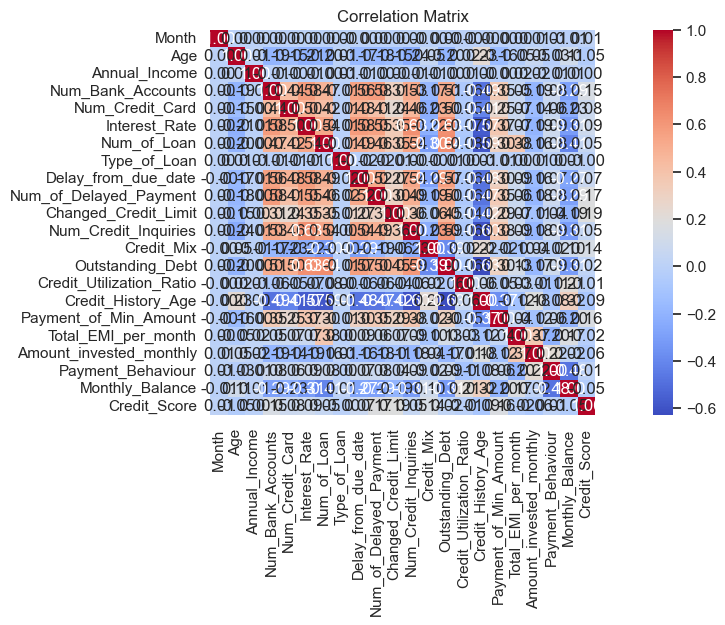

In [16]:
corr_matrix = df_train_onehot.corr()

plt.figure(figsize = (15, 5))
sns.heatmap(corr_matrix, annot = True, fmt = ".2f", cmap = "coolwarm", square = True)
plt.title("Correlation Matrix")
plt.show()

In [17]:
print("Stats of the testing dataset:")
df_test.describe()

Stats of the testing dataset:


Age  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
count  21938.000     2.1938e+04             21938.0000         21938.0000   
mean      33.376     1.5839e+05              3936.8754             5.5636   
std       10.605     1.3156e+06              3040.6639             2.5767   
min       14.000     7.0059e+03               303.6454             0.0000   
25%       25.000     1.8668e+04              1548.3483             4.0000   
50%       33.000     3.5609e+04              2944.6133             6.0000   
75%       42.000     6.7686e+04              5532.5033             8.0000   
max       56.000     2.4017e+07             15204.6333            11.0000   

       Num_Credit_Card  Interest_Rate  Num_of_Loan  Delay_from_due_date  \
count       21938.0000     21938.0000   21938.0000           21938.0000   
mean            5.6742        15.3515       3.9973              22.3138   
std             2.0970         8.8810       2.2285              15.2552   
min             0.0000         1.0000       1.0000               0.0000   
25%             4.0000         8.0000       2.0000              11.0000   
50%             6.0000        15.0000       4.0000              19.0000   
75%             7.0000        21.0000       6.0000              29.0000   
max            11.0000        34.0000       9.0000              67.0000   

       Num_of_Delayed_Payment  Changed_Credit_Limit  Num_Credit_Inquiries  \
count              21938.0000            21938.0000            21938.0000   
mean                  13.8447               10.7380                7.6749   
std                    6.1866                6.9611                3.9881   
min                    0.0000               -6.4500                0.0000   
25%                    9.0000                5.5900                5.0000   
50%                   14.0000                9.6800                7.0000   
75%                   19.0000               15.4700               11.0000   
max                   28.0000               36.6500               17.0000   

       Outstanding_Debt  Credit_Utilization_Ratio  Credit_History_Age  \
count        21938.0000                21938.0000          21938.0000   
mean          1533.9416                   32.1243             18.1718   
std           1193.9589                    5.0464              8.3338   
min              0.2300                   20.5097              0.8333   
25%            628.1100                   27.9341             11.5833   
50%           1264.6100                   32.1695             18.0000   
75%           2186.2000                   36.2740             24.6667   
max           4997.1000                   48.0965             34.0000   

       Total_EMI_per_month  Amount_invested_monthly  Monthly_Balance  
count           21938.0000               21938.0000       21938.0000  
mean              113.7971                 185.1059         378.4843  
std                98.0876                 187.3826         191.7136  
min                 4.4628                   0.0000           0.1034  
25%                41.3204                  70.0223         263.9701  
50%                78.2712                 123.5700         322.7969  
75%               164.0646                 222.2886         438.6903  
max               499.9292                1801.3582        1496.4089

In [18]:
### possible new visulizations
import plotly.express as px

df = pd.DataFrame({
    'Date': pd.date_range(start='1/1/2020', periods=100, freq='D'),
    'Value': np.random.randn(100).cumsum()
})

fig = px.line(df, x='Date', y='Value', title='Interactive Time-Series Plot')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

### Hypothesis Testing with Chi-Square and F-Tests

Purpose: To understand the relationship between features (both categorical and numerical) and the target variable 'Credit_Score'. This step is crucial for:
1. Identifying which features have significant relationships with the target variable.
2. Reducing the dimensionality of the problem by filtering out features that do not show a statistically significant relationship with the target variable.

In [19]:
import pandas as pd
from scipy.stats import chi2_contingency, f_oneway

def chi_2_test(data, numerical_cols, target):
    results = {'Feature': [], 'Test Statistic': [], 'p-value': [], 'Significance': []}

    for col in numerical_cols:
        groups = [data[data[target] == val][col] for val in data[target].unique()]
        fstat, p = f_oneway(*groups)
        results['Feature'].append(col)
        results['Test Statistic'].append(fstat)
        results['p-value'].append(p)
        results['Significance'].append(p < 0.05)

    return pd.DataFrame(results)

In [20]:
numerical_cols = df_train_onehot.drop(['Credit_Score'], axis=1).columns
target = df_train_onehot['Credit_Score']

#chi2_summary = chi_2_test(df_train, numerical_cols, target)
#chi2_summary_sorted = chi2_summary.sort_values(by="Test Statistic", ascending=False)
#print(chi2_summary_sorted)

In [21]:
#chi2_summary.style.bar("t-statistic").background_gradient("Blues", subset="t-statistic")

In [22]:
#fig, ax = plt.subplots(figsize=(7, 5))
#sns.barplot(data=chi2_summary, y="column", x="t-statistic", ax=ax)
#plt.setp([ax.get_xticklabels(), ax.get_yticklabels()], size=8)
#fig.show()

### Feature Engineering

In [23]:
# standardization
from sklearn.preprocessing import StandardScaler

# Initialize
scaler = StandardScaler()

df_train_scaled = scaler.fit_transform(df_train_onehot)
df_train_scaled = pd.DataFrame(df_train_scaled, columns=df_train_onehot.columns)
df_train_scaled

Month     Age  Annual_Income  Num_Bank_Accounts  Num_Credit_Card  \
0     -0.2232 -0.9277        -0.1088            -1.0075          -0.8048   
1      1.5244 -0.9277        -0.1088            -1.0075          -0.8048   
2      0.2137 -0.9277        -0.1088            -1.0075          -0.8048   
3     -0.6601 -0.4570        -0.0980            -1.3986          -0.8048   
4      1.5244 -0.4570        -0.0980            -1.3986          -0.8048   
...       ...     ...            ...                ...              ...   
44676 -0.2232 -0.8336        -0.0947            -0.6164           0.1559   
44677  1.0875 -0.7394        -0.0947            -0.6164           0.1559   
44678 -1.5339 -0.7394        -0.0947            -0.6164           0.1559   
44679  1.5244 -0.7394        -0.0947            -0.6164           0.1559   
44680  0.2137 -0.7394        -0.0947            -0.6164           0.1559   

       Interest_Rate  Num_of_Loan  Type_of_Loan  Delay_from_due_date  \
0            -1.3943      -0.0032       -1.6719              -1.2692   
1            -1.3943      -0.0032       -1.6719              -1.0719   
2            -1.3943      -0.0032       -1.6719              -1.2692   
3            -1.0556      -1.3518       -1.3672              -1.0061   
4            -1.0556      -1.3518       -1.3672              -1.2692   
...              ...          ...           ...                  ...   
44676        -0.9428      -0.9023       -1.3677               0.0460   
44677        -0.9428      -0.9023       -1.3677              -0.1513   
44678        -0.9428      -0.9023       -1.3677               0.0460   
44679        -0.9428      -0.9023       -1.3677              -0.2828   
44680        -0.9428      -0.9023       -1.3677              -0.1513   

       Num_of_Delayed_Payment  ...  Credit_Mix  Outstanding_Debt  \
0                     -1.1122  ...      1.3828           -0.5970   
1                     -1.5982  ...     -0.5368           -0.5970   
2                     -1.5982  ...     -0.5368           -0.5970   
3                     -2.0842  ...     -0.5368           -0.7683   
4                     -2.0842  ...     -0.5368           -0.7683   
...                       ...  ...         ...               ...   
44676                  1.8039  ...      1.3828           -0.8541   
44677                 -1.2742  ...      1.3828           -0.8541   
44678                 -1.1122  ...      1.3828           -0.8541   
44679                 -1.1122  ...      1.3828           -0.8541   
44680                 -1.1122  ...     -0.5368           -0.8541   

       Credit_Utilization_Ratio  Credit_History_Age  Payment_of_Min_Amount  \
0                       -1.0533              0.5291                -0.6428   
1                       -1.4532              0.5691                -0.6428   
2                       -1.8994              0.5891                -0.6428   
3                        1.2624              1.0791                -0.6428   
4                        0.5569              1.1091                -0.6428   
...                         ...                 ...                    ...   
44676                    0.1647              1.6290                -0.6428   
44677                    1.4150              1.6490                -0.6428   
44678                    0.4949              1.6590                -0.6428   
44679                    1.6602              1.6690                -0.6428   
44680                    0.2924              1.6890                -0.6428   

       Total_EMI_per_month  Amount_invested_monthly  Payment_Behaviour  \
0                  -0.6355                  -0.5591            -0.5125   
1                  -0.6355                  -0.7614            -1.0490   
2                  -0.6355                  -0.0511             1.0971   
3                  -0.9615                  -0.7667            -1.5855   
4                  -0.9615                  -0.3013             1.0971   
...                    ...      

In [24]:
# same treatment to the test df
df_test_scaled = scaler.fit_transform(df_test_onehot)
df_test_scaled = pd.DataFrame(df_test_scaled, columns=df_test_onehot.columns)

In [25]:
X_train = df_train_onehot.drop("Credit_Score", axis=1)
y_train = df_train_onehot["Credit_Score"]
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

In [26]:
# feature selection through k best
# Univariate
from sklearn.feature_selection import SelectKBest, f_regression

k = 5
selector = SelectKBest(f_regression, k=k)
X_new = selector.fit_transform(X_train_scaled_df, y_train)

selected_indices = selector.get_support(indices=True)

features_kbest = X_train_scaled_df.columns[selected_indices]
print(features_kbest)

Index(['Num_Bank_Accounts', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Credit_Mix', 'Payment_of_Min_Amount'],
      dtype='object')


In [27]:
# feature selection through L1 regression
from sklearn.linear_model import Lasso

k = 5
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled_df, y_train)
#lasso_mask = lasso.coef_ != 0

coefficients = np.abs(lasso.coef_)

sorted_idx = np.argsort(coefficients)

# Use the indices to get the k largest coefficients
top_k_idx = sorted_idx[-k:]

features_lasso = X_train_scaled_df.columns[top_k_idx]
print(features_lasso)

Index(['Delay_from_due_date', 'Payment_of_Min_Amount', 'Credit_Mix',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit'],
      dtype='object')


In [28]:
# Pipeline construction
from sklearn.pipeline import Pipeline

# Create a pipeline that first selects the k best features, then applies Lasso
pipeline = Pipeline([
  ('feature_selection', SelectKBest(f_regression, k=5)),
  ('lasso', Lasso(alpha=0.1))
])

pipeline.fit(X_train_scaled_df, y_train)

selected_features_pipeline = X_train_scaled_df.columns[pipeline.named_steps['feature_selection'].get_support()]
print(selected_features_pipeline)

Index(['Num_Bank_Accounts', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Credit_Mix', 'Payment_of_Min_Amount'],
      dtype='object')


Repetitive important features: 'Num_Bank_Accounts', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit'

**Feature Importance:**

1. Num_of_Delayed_Payment (3 times)
2. Changed_Credit_Limit (3 times)
3. Credit_Mix (3 times)
4. Payment_of_Min_Amount (3 times)
5. Num_Bank_Accounts (2 times)
6. Delay_from_due_date (1 time)


**Numerical Features:**

1. **Num_Bank_Accounts** - A count of the number of bank accounts, a straightforward numerical value.
2. **Num_of_Delayed_Payment** - A count of the number of times payments were delayed, a straightforward numerical value.
3. **Changed_Credit_Limit** - Represents changes in the credit limit, typically a numerical amount.
4. **Delay_from_due_date** - The number of days a payment was delayed beyond the due date, clearly numerical.


**Categorical Features:**

1. **Credit_Mix** - Often a qualitative assessment of credit diversity (e.g., good, bad, diverse), making it categorical.
2. **Payment_of_Min_Amount** - Usually indicates whether the minimum payment was made or not, typically categorical (e.g., Yes, No).

### Baseline Models Building
1. Logistic Regression
2. Random Forest Classifier
3. SVM
4. CatBoost(optional)

In [29]:
# none treatment added this time

In [30]:
####
#### df_test missing the credit score column
# # For the training data
#X_train = df_train_onehot.drop('Credit_Score', axis=1)
#y_train = df_train_onehot['Credit_Score']

## For the testing data
#X_test = df_test_onehot.drop('Credit_Score', axis=1)
#y_test = df_test_onehot['Credit_Score']

#### Logistic Regression Model

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import joblib

# Assuming X_train and y_train are defined and contain your training data
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression Classifier
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train, y_train)

# Save the model to disk
joblib.dump(logreg, 'LOG_Model.pkl')

# Making predictions to test accuracy (not necessary for saving the model)
y_pred = logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Logistic Regression Accuracy: {accuracy}')


Logistic Regression Accuracy: 0.6251538547611055


#### Random Forest Forecast Model

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(n_estimators=100, random_state=42)  # n_estimators is the number of trees
rf.fit(X_train, y_train)

# Save the model to disk
joblib.dump(rf, 'RF_Model.pkl')

y_pred = rf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Random Forest Accuracy: {accuracy}')


Random Forest Accuracy: 0.7753161016000896


#### SVM Model

In [33]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Feature scaling improves the performance of SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Save the model to disk
joblib.dump(svm_model, 'SVM_Model.pkl')

y_pred = svm_model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'SVM Model Accuracy: {accuracy}')


SVM Model Accuracy: 0.6626101552664708


In [34]:
def create_pool(xtrain, ytrain, xtest, ytest, cat_features, text_features):
    Xtrain_pool = Pool(data=xtrain, label=ytrain, cat_features=cat_features, text_features=text_features)
    Xtest_pool = Pool(data=xtest, label=ytest, cat_features=cat_features, text_features=text_features)
    return (Xtrain_pool, Xtest_pool)


def catboost_model(params = {}):
    cb_params = {
        "iterations": 10000,
        "custom_metric": ["F1", "AUC", "Accuracy"],
        "thread_count":-1,
        "random_state": 42,
        "train_dir": "/catboost"

    }
    cb_params.update(params)

    model = CatBoostClassifier(**cb_params)
    return model


def fit_model(xtrain, ytrain, xtest, ytest, cat_features, text_features, params = {}, **kwargs):
    Xtrain_pool, Xtest_pool = create_pool(xtrain, ytrain, xtest, ytest, cat_features, text_features)
    model = catboost_model(params = params)
    model.fit(Xtrain_pool, eval_set=Xtest_pool, early_stopping_rounds=500, **kwargs)
    return model

## Model Refinement with Feature Selection

In this Python code snippet, feature selection and model refinement are performed for machine learning tasks.

- **Feature Selection**: It starts by creating a copy of the dataset (`df_copy`) with low-importance features removed using a condition based on feature importances. This preprocessing step helps focus on the most relevant features for modeling.

- **Data Transformation**: The data is then transformed using a function `get_transformed_data`, which prepares the training and testing sets along with specific transformers. This step ensures the data is ready for modeling.

- **Model Refinement**: A machine learning model is trained using the refined dataset (`Xtrain1`, `ytrain1`) and relevant categorical (`cat_columns`) and text (`text_column`) features. The model is fine-tuned with specific parameters, including text processing methods, task type (GPU), class weights, and maximum depth, enabling better predictive performance.

This code showcases a systematic approach to feature selection and model refinement, enhancing the effectiveness of machine learning models for predictive tasks.


### Catboost model

In [35]:
# feature selection, top k
important_features = ['Num_Bank_Accounts', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
                      'Credit_Mix', 'Payment_of_Min_Amount', 'Credit_Score']  # Include the target variable

df_refined = df_train_onehot[important_features]


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

def get_transformed_data(df, target_col, cat_features, num_features):
    # Define preprocessing for numerical data: scale data
    numeric_transformer = Pipeline(steps=[
        ('scaler', StandardScaler())
    ])

    # Define preprocessing for categorical data: encode categorical variables
    categorical_transformer = Pipeline(steps=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

    # Combine preprocessing steps
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, num_features),
            ('cat', categorical_transformer, cat_features)
        ])

    # Separate features and target variable, then split into training/testing sets
    X = df.drop(target_col, axis=1)
    y = df[target_col]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Fit and transform the training data, and transform the test data
    X_train_transformed = preprocessor.fit_transform(X_train)
    X_test_transformed = preprocessor.transform(X_test)

    return X_train_transformed, X_test_transformed, y_train, y_test

# Assuming the target is 'Credit_Score', categorical and numerical features need to be specified
categorical_features = ['Credit_Mix', 'Payment_of_Min_Amount']  # example, adjust according to your data
numerical_features = ['Num_Bank_Accounts', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit']

X_train1, X_test1, y_train1, y_test1 = get_transformed_data(df_refined, 'Credit_Score', categorical_features, numerical_features)


In [37]:
from catboost import CatBoostClassifier

def train_model(X_train, y_train, X_test, y_test):
    # Define CatBoost model without specifying cat_features
    model = CatBoostClassifier(
        iterations=1000,
        task_type="GPU",
        auto_class_weights='Balanced',
        depth=6,
        text_processing=None  # Assuming no text features for simplicity
    )

    # Train the model on the preprocessed data without specifying cat_features
    model.fit(X_train, y_train, eval_set=(X_test, y_test), verbose=500, plot=True)

    return model

# Assuming X_train1 and X_test1 are the transformed datasets and cat_features are already encoded
model = train_model(X_train1, y_train1, X_test1, y_test1)

# Save the model to disk
joblib.dump(model, 'CAT_Model.pkl')

ModuleNotFoundError: No module named 'catboost'

## Making Prediction with the Models

In [ ]:
import pandas as pd
import joblib
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load trained models (adjust filenames to your models)
model1 = joblib.load('LOG_Model.pkl')
model2 = joblib.load('RF_Model.pkl')
model3 = joblib.load('SVM_Model.pkl')
model4 = joblib.load('CAT_Model.pkl')


# Define the preprocessor (adjust with the actual preprocessing steps used for training)
categorical_features = ['Credit_Mix', 'Payment_of_Min_Amount']
numerical_features = ['Num_Bank_Accounts', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Delay_from_due_date ']

numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

def get_user_input():
    # Prompt the user for feature input (adjust for your specific features)
    user_data = {}
    user_data['Num_Bank_Accounts'] = float(input('Enter value for Num_Bank_Accounts: '))
    user_data['Num_of_Delayed_Payment'] = float(input('Enter value for Num_of_Delayed_Payment: '))
    user_data['Changed_Credit_Limit'] = float(input('Enter value for Changed_Credit_Limit: '))
    user_data['Delay_from_due_date'] = float(input('Enter value for Delay_from_due_date: '))
    user_data['Credit_Mix'] = input('Enter value for Credit_Mix: ')
    user_data['Payment_of_Min_Amount'] = input('Enter value for Payment_of_Min_Amount: ')

    # Convert to DataFrame
    df_user_input = pd.DataFrame([user_data])
    return df_user_input

def make_ensemble_prediction(user_input_df):
    # Preprocess user input
    user_input_preprocessed = preprocessor.transform(user_input_df)

    # Make predictions using each model
    pred1 = model1.predict(user_input_preprocessed)
    pred2 = model2.predict(user_input_preprocessed)
    pred3 = model3.predict(user_input_preprocessed)
    pred4 = model4.predict(user_input_preprocessed)


    # Combine predictions (here we use simple averaging, adjust as needed)
    final_pred = (pred1 + pred2 + pred3 + pred4) / 4

    return final_pred

# Main program to get user input and make ensemble prediction
if __name__ == "__main__":
    user_input_df = get_user_input()
    prediction = make_ensemble_prediction(user_input_df)
    print("The final ensemble prediction is:", prediction)


# Drafts

In [ ]:
# feature selection, top k
important_features = ['Num_Bank_Accounts', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
                      'Credit_Mix', 'Payment_of_Min_Amount']

X_train_refined = df_train_scaled[important_features]
y_train_refined = df_train_scaled["Credit_Score"]

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# This assumes X_train_refined and y_train_refined are your full training datasets.
X_train, X_val, y_train, y_val = train_test_split(X_train[important_features], y_train, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
logreg = LogisticRegression(solver='liblinear')  # Good choice for binary classification and smaller datasets

# Train the model
logreg.fit(X_train, y_train)

# Predict on the validation set
y_pred_logreg = logreg.predict(X_val)

# Calculate and print the accuracy
accuracy_logreg = accuracy_score(y_val, y_pred_logreg)
print(f'Logistic Regression Validation Accuracy: {accuracy_logreg}')